IMPORT NEEDED LIBRARIES AND READ THE CSV FILE

In [406]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data1 = pd.read_csv('Bengaluru_House_Data.csv')
data1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [407]:
print(data1.shape)
data1.groupby('area_type')['area_type'].count()

(13320, 9)


area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

DROP SOME UNWANTED COLUMNS

In [408]:
data2 = data1.drop(['area_type','availability','society','balcony'],axis=1)
data2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


DROP MISSING VALUES

In [409]:
print(data2.isnull().sum())
data3 = data2.dropna()
data3.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64


location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

HAVE A ISSUE WITH SIZE COLUMN SO CORRECT IT

In [410]:
data3['size']

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13246, dtype: object

In [411]:
data3['bhk'] = data3['size'].apply( lambda x : float(x.split()[0]))
data3

C:\Users\shaha\AppData\Local\Temp\ipykernel_7008\113598808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['bhk'] = data3['size'].apply( lambda x : float(x.split()[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3.0
4,Kothanur,2 BHK,1200,2.0,51.00,2.0
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5.0
13316,Richards Town,4 BHK,3600,5.0,400.00,4.0
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2.0
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4.0


In [412]:
print(data3['bhk'].unique())
#just checking the 43 bhk ie the bedrooms

print('\n It has only 2400 sqfeet so 43 bedrooms are not possible so its an outlier which is found from domain knowledge')
data3[data3['bhk']==43]

[ 2.  4.  3.  6.  1.  8.  7.  5. 11.  9. 27. 10. 19. 16. 43. 14. 12. 13.
 18.]

 It has only 2400 sqfeet so 43 bedrooms are not possible so its an outlier which is found from domain knowledge


,location,size,total_sqft,bath,price,bhk
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43.0


In [413]:
data4 = data3[data3['bhk']!=43]
data4
#removed that row where its an outlier

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3.0
4,Kothanur,2 BHK,1200,2.0,51.00,2.0
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5.0
13316,Richards Town,4 BHK,3600,5.0,400.00,4.0
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2.0
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4.0


In [414]:
print(data4['total_sqft'].unique())
#there are some values as range so let me take its mean and replace it 

['1056' '2600' '1440' ... '1133 - 1384' '774' '4689']


In [415]:
#checking which all rows doesnt have correct format in column total_sqft

def is_float(value):
    try:
        float(value)
    except:
        return value

data4[data4['total_sqft'] == data4['total_sqft'].apply(is_float)]
    

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4.0
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4.0
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2.0
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2.0
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2.0
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2.0
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3.0
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2.0
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2.0


In [416]:
def convert_to_num(value):
    list1 = value.split('-')
    if len(list1) == 2:
        return ( float(list1[0])+float(list1[1]) ) /2
    try:
        return float(value)
    except:
        return None
    
data5 = data4.copy()
data5['total_sqft'] = data5['total_sqft'].apply(convert_to_num)
print(data5['total_sqft'].unique())
#everything has been converted to float numbers
data5

[1056.  2600.  1440.  ... 1258.5  774.  4689. ]


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5.0
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4.0
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2.0
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4.0


# FEATURE ENGINEERING

ADDING EXTRA COLUMNS WHICH WILL BE HELPFUL

In [417]:
data6 = data5.copy()
# sqft is so important in house price predicition so adding price per prediction which is helpful
# multiplying by 1,10,000 as price is represented in lakhs
data6['price_per_sqft'] = data6['price']*100000 / data6['total_sqft']
data6

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5.0,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4.0,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2.0,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4.0,10407.336319


THERE ARE CATEGORICAL VALUES HERE : USUALLY WE PERFORM ONE-HOT ENCODING BUT HERE THERE IS AN ISSUE

In [418]:
print(data6.location.nunique())

1304


THERE ARE MANY UNIQUE LOCATION SO HARD TO PERFORM ENCODING

In [419]:
data6.groupby('location')['location'].unique().count()

1304

In [420]:
# finiding the locations with less no: of datapoints
location_stats = data6.groupby('location')['location'].count().sort_values(ascending=False)
#there are many locations with less no of datapoints so we will just categorize the locations with less datapoints together
location_stats

location
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

In [421]:
data7 = data6.copy()
location_stats = location_stats[ location_stats <= 10 ]
data7.location = data7['location'].apply( lambda x : 'other' if x in location_stats else x)
data7.location.nunique()                                                                                                                                                                                                                             

242

In [422]:
data7.head(30)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2.0,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4.0,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4.0,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3.0,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6.0,36274.509804


# DETECTION OF OUTLIERS

FIRSTLY FROM DOMAIN KNOWLEDGE

A Domain expert says each bedroom should have at least 300 squarefeets

In [423]:
data7[data7.total_sqft/data7.bhk < 300]
# these are the outliers from domain knowledge , so removing

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6.0,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8.0,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6.0,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8.0,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3.0,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7.0,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6.0,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5.0,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5.0,9043.927649


In [424]:
data8 = data7[~(data7['total_sqft'] / data7['bhk'] < 300)]
data8

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5.0,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4.0,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2.0,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4.0,10407.336319


Finding outliers in price_per_sqft with mean and std AND REMOVING THEM

In [425]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame() 
    #grouping by location 
    for key , subdf in df.groupby('location'):
        # key is the location and subdf is the remaining data of the specific location
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft <= (mean+std))&(subdf.price_per_sqft > (mean-std))]
        df_out = pd.concat([df_out,reduced_df])
    return df_out

In [426]:
data9 = remove_pps_outliers(data8)
#removed about 2000 outliers from price_per_sqft
data9

,location,size,total_sqft,bath,price,bhk,price_per_sqft
152,Devarachikkanahalli,3 BHK,1250.0,2.0,44.00,3.0,3520.000000
341,Devarachikkanahalli,2 BHK,1250.0,2.0,40.00,2.0,3200.000000
2474,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.00,2.0,6916.666667
5030,Devarachikkanahalli,2 BHK,1170.0,2.0,40.00,2.0,3418.803419
5771,Devarachikkanahalli,3 BHK,1425.0,2.0,65.00,3.0,4561.403509
...,...,...,...,...,...,...,...
13285,other,2 BHK,1353.0,2.0,110.00,2.0,8130.081301
13291,other,1 Bedroom,812.0,1.0,26.00,1.0,3201.970443
13292,other,3 BHK,1440.0,2.0,63.93,3.0,4439.583333
13302,other,2 BHK,1075.0,2.0,48.00,2.0,4465.116279


NOW CHECKING FURTHER OUTLIERS IF IN BATHROOM COLUMN 

In [427]:
data9.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [428]:
#checking how many of the houses has greater than 10 bathrooms as it may be unusual based on domain knowledge
data9[data9.bath > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8636,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10.0,4000.000000
3096,other,10 BHK,12000.0,12.0,525.0,10.0,4375.000000
3609,other,16 BHK,10000.0,16.0,550.0,16.0,5500.000000
7979,other,11 BHK,6000.0,12.0,150.0,11.0,2500.000000
9935,other,13 BHK,5425.0,13.0,275.0,13.0,5069.124424


Text(0, 0.5, 'count')

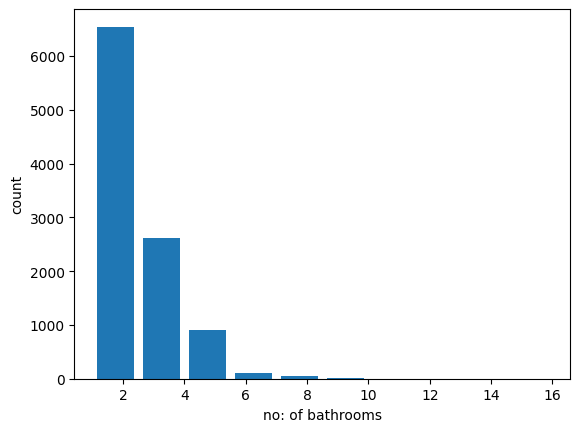

In [429]:
#lets plot a histogram and check how much outliers may be there
plt.hist(data9.bath,rwidth=0.8)
plt.xlabel('no: of bathrooms')
plt.ylabel('count')

In [430]:
# from domain knowledge understood that if number of bathrooms can exceed 2+number bedrooms it is outlier
data10 = data9[data9.bath < data9.bhk + 2]
#so removing those outliers
data10

,location,size,total_sqft,bath,price,bhk,price_per_sqft
152,Devarachikkanahalli,3 BHK,1250.0,2.0,44.00,3.0,3520.000000
341,Devarachikkanahalli,2 BHK,1250.0,2.0,40.00,2.0,3200.000000
2474,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.00,2.0,6916.666667
5030,Devarachikkanahalli,2 BHK,1170.0,2.0,40.00,2.0,3418.803419
5771,Devarachikkanahalli,3 BHK,1425.0,2.0,65.00,3.0,4561.403509
...,...,...,...,...,...,...,...
13285,other,2 BHK,1353.0,2.0,110.00,2.0,8130.081301
13291,other,1 Bedroom,812.0,1.0,26.00,1.0,3201.970443
13292,other,3 BHK,1440.0,2.0,63.93,3.0,4439.583333
13302,other,2 BHK,1075.0,2.0,48.00,2.0,4465.116279


In [431]:
#dropping some columns which is not now needed
data11 = data10.drop(data10[['size' ,'price_per_sqft']] , axis=1)
data11

,location,total_sqft,bath,price,bhk
152,Devarachikkanahalli,1250.0,2.0,44.00,3.0
341,Devarachikkanahalli,1250.0,2.0,40.00,2.0
2474,Devarachikkanahalli,1200.0,2.0,83.00,2.0
5030,Devarachikkanahalli,1170.0,2.0,40.00,2.0
5771,Devarachikkanahalli,1425.0,2.0,65.00,3.0
...,...,...,...,...,...
13285,other,1353.0,2.0,110.00,2.0
13291,other,812.0,1.0,26.00,1.0
13292,other,1440.0,2.0,63.93,3.0
13302,other,1075.0,2.0,48.00,2.0


# HANDLE CATEGORICAL VALUES

USE LABEL ENCODING FOR LOCATION

In [432]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data11['location'] = label_encoder.fit_transform(data11['location'])
data11.head(25)

,location,total_sqft,bath,price,bhk
152,0,1250.0,2.0,44.0,3.0
341,0,1250.0,2.0,40.0,2.0
2474,0,1200.0,2.0,83.0,2.0
5030,0,1170.0,2.0,40.0,2.0
5771,0,1425.0,2.0,65.0,3.0
6591,0,947.0,2.0,43.0,2.0
7536,0,1130.0,2.0,36.0,2.0
7767,0,1417.0,2.0,76.0,3.0
8268,0,1230.0,2.0,58.0,2.0
8954,0,1705.0,3.0,75.0,3.0


THE MODEL BUILDING

In [433]:
# seperating the independant variables ( features ) and the dependant variable ( value to be predicted )
X = data11.drop('price',axis=1)
Y = data11.price
print(X.head(5))
print(Y.head(5))

      location  total_sqft  bath  bhk
152          0      1250.0   2.0  3.0
341          0      1250.0   2.0  2.0
2474         0      1200.0   2.0  2.0
5030         0      1170.0   2.0  2.0
5771         0      1425.0   2.0  3.0
152     44.0
341     40.0
2474    83.0
5030    40.0
5771    65.0
Name: price, dtype: float64


TO TRAIN AND TEST DATA USING SKLEARN LIBRARY

In [434]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2 , random_state=2)

In [435]:
#importing a linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
#model is being trained with linear regression
lr.score(X_test,Y_test)
#checking the accuracy
#it has 75% score or accuracy

0.7538551926306782

In [436]:
def predict_price(location,sqft,bath,bhk):    
    x = np.zeros(len(X.columns))
    x[0] = label_encoder.transform([location])
    x[1] = sqft
    x[2] = bath
    x[3] = bhk
    return lr.predict([x])[0]

In [437]:
predict_price('1st Phase JP Nagar',1000, 2, 2)


C:\Users\shaha\AppData\Local\Temp\ipykernel_7008\981303469.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[0] = label_encoder.transform([location])
c:\Users\shaha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


49.58699721916928

In [438]:
predict_price('Indira Nagar',1000, 3, 3)

C:\Users\shaha\AppData\Local\Temp\ipykernel_7008\981303469.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[0] = label_encoder.transform([location])
c:\Users\shaha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


53.61715959461233